In [22]:
import numpy as np
import matplotlib.pyplot as plt

from diffusion_map import DiffusionMap
from datafold.utils.plot import plot_pairwise_eigenvector
from dataset import Dataset

import 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, time):
    """
    Plot different graphs with respect to selected part.
    """
    print(f"{sample} Largest eigenvalues with respect this dataset: \n {evals}")
    idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

    if part == 1 or part == 2:
        plot_pairwise_eigenvector(
            eigenvectors=evecs[idx_plot, :],
            n=1,
            fig_params=dict(figsize=[15, 7]),
            scatter_params=dict(cmap=plt.cm.Spectral, c=time[idx_plot]),
        ) 
    elif part == 3:
        pass
    
    plt.show()


## Initializations:

In [17]:
nr_samples = 5000        # Number of samples
nr_samples_plot = 1000   # Number of samples to plot
n_evecs = 10              # L+1 largest eigenfunctions
radius = 5               # Radius around a point for distance computation

### Part 1: Swiss-roll Data set embedding using our implementations

In [18]:
part = 1

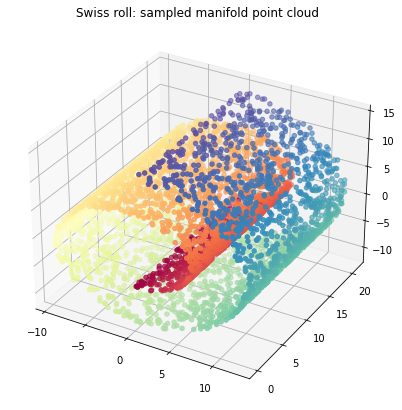

In [19]:
dataset = Dataset(nr_samples, nr_samples_plot)
positions, positions_color = dataset.generate_swiss_roll()
dataset.plot_swiss_roll(positions, positions_color)


10 Largest eigenvalues with respect this dataset: 
 [1.         0.99969454 0.99879842 0.9972545  0.99520423 0.99494959
 0.99465514 0.99374028 0.99251418 0.99210118 0.99014591]


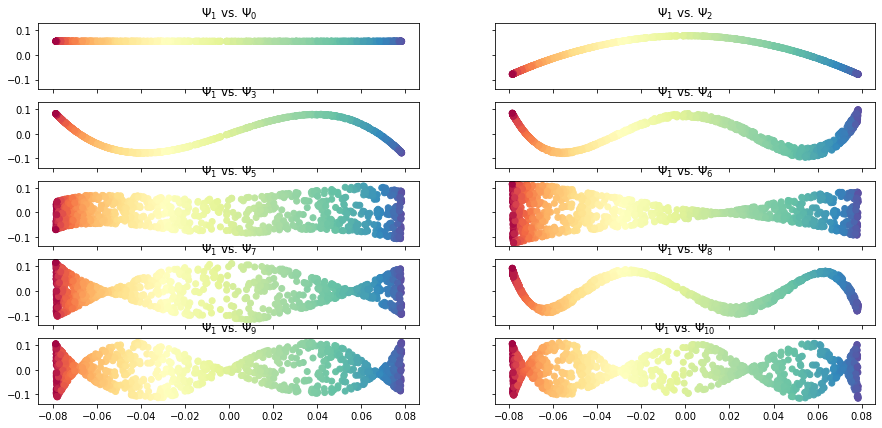

In [20]:
dmap = DiffusionMap()
evecs, evals = dmap.compute_eigenfunctions(positions, n_evecs, radius)

# Plot the eigenfunction phi_1 with respect to the others
plot_eigenfunctions(n_evecs, nr_samples, nr_samples_plot, part, evecs, evals, positions_color)

## Part 2: Swiss-roll Data set embedding using DataFold Library

In [23]:
part = 2

10 Largest eigenvalues with respect this dataset: 
 [1.         0.99962789 0.99852733 0.99664246 0.99411047 0.99390135
 0.99325779 0.99225901 0.99085678 0.99029946]


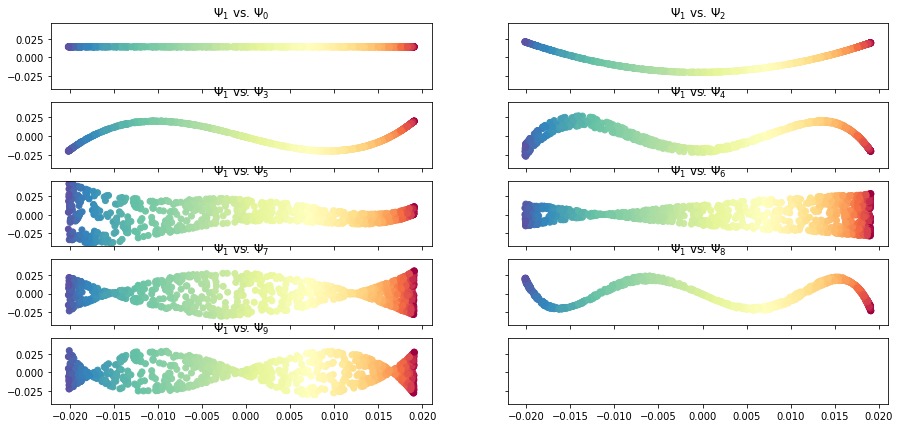

In [24]:
dmap = DiffusionMap()
evecs, evals = dmap.compute_eigenfunctions_datafold(positions, n_evecs)

# Plot the eigenfunction phi_1 with respect to the others
plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, positions_color)

### Part 3: Swiss-roll Data set embedding using Sklearn Library